In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\athir\Downloads\ABC_company_data.csv.csv") 

# Replacing 'height' column values with random numbers between 150 and 180
df["height"] = np.random.randint(150, 181, size=len(df))

df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,height
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0,172
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0,169
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN,158
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0,161
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0,175


In [3]:
# Save the updated dataset to a new CSV file
df.to_csv("ABC_company_data_processed.csv", index=False)

print("Preprocessing completed. Updated file saved as 'ABC_company_data_processed.csv'")


Preprocessing completed. Updated file saved as 'ABC_company_data_processed.csv'


In [4]:
team_distribution = df["Team"].value_counts(normalize=True) * 100
print("Team_distribution: \n", team_distribution)

Team_distribution: 
 New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks          3.275109

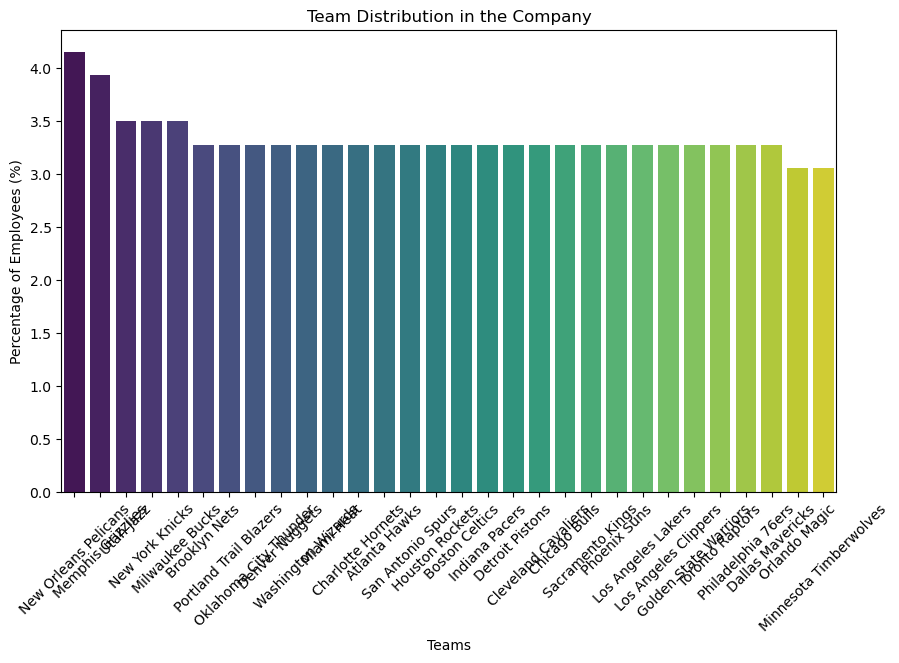

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creation of bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=team_distribution.index, y=team_distribution.values, palette="viridis")

# Labels and Title
plt.xlabel("Teams")
plt.ylabel("Percentage of Employees (%)")
plt.title("Team Distribution in the Company")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.show()



In [7]:
position_distribution = df["Position"].value_counts()
print("Position distribution: \n",position_distribution)

Position distribution: 
 SG    102
PF    100
PG     92
SF     85
C      79
Name: Position, dtype: int64


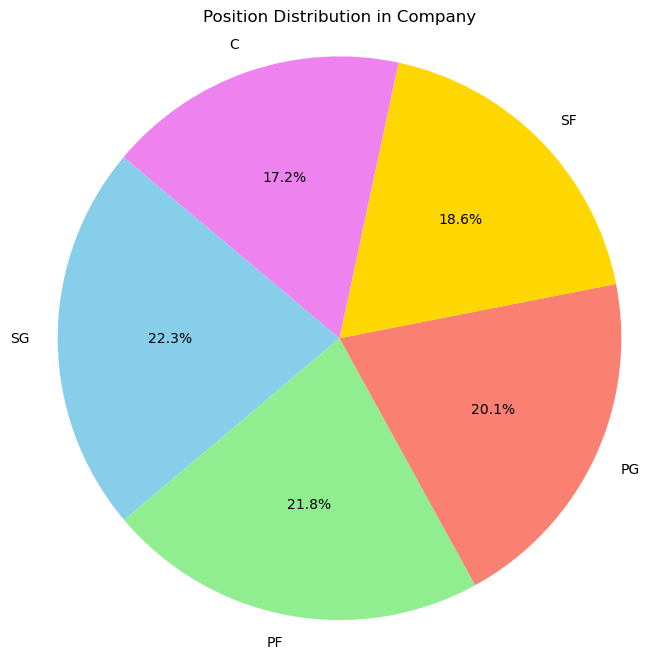

In [8]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(position_distribution, labels=position_distribution.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'salmon', 'gold', 'violet'])

# Title and formatting
plt.title("Position Distribution in Company")
plt.axis("equal")  # Ensures the pie chart is circular

# Show the pie chart
plt.show()


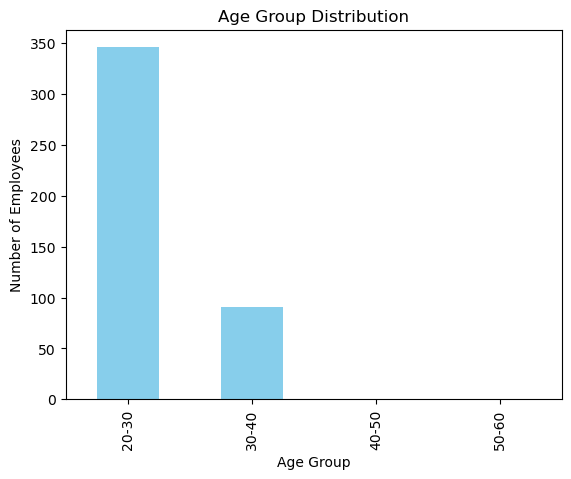

Team Salary:
 Team
Cleveland Cavaliers       106988689.0
Los Angeles Clippers       94854640.0
Oklahoma City Thunder      93765298.0
Golden State Warriors      88868997.0
Chicago Bulls              86783378.0
San Antonio Spurs          84442733.0
New Orleans Pelicans       82750774.0
Miami Heat                 82515673.0
Charlotte Hornets          78340920.0
Memphis Grizzlies          76550880.0
Washington Wizards         76328636.0
Houston Rockets            75283021.0
New York Knicks            73303898.0
Atlanta Hawks              72902950.0
Los Angeles Lakers         71770431.0
Sacramento Kings           71683666.0
Dallas Mavericks           71198732.0
Toronto Raptors            71117611.0
Milwaukee Bucks            69603517.0
Detroit Pistons            67168263.0
Indiana Pacers             66751826.0
Utah Jazz                  64007367.0
Phoenix Suns               63445135.0
Orlando Magic              60161470.0
Denver Nuggets             60121930.0
Minnesota Timberwolves     5970

In [9]:
# Creating age bins
df["Age_group"] = pd.cut(df["Age"], bins=[20, 30, 40, 50, 60], labels=["20-30", "30-40", "40-50", "50-60"])

# Count occurrences of each age group
age_group_counts = df["Age_group"].value_counts()

# Plot
age_group_counts.plot(kind="bar", color="skyblue", title="Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of Employees")
plt.show()

# Highest salary expenditure by team
team_salary = df.groupby("Team")["Salary"].sum().sort_values(ascending=False)
print("Team Salary:\n",team_salary)

# Highest salary expenditure by position
position_salary = df.groupby("Position")["Salary"].sum().sort_values(ascending=False)
print("Position Salary:\n",position_salary)

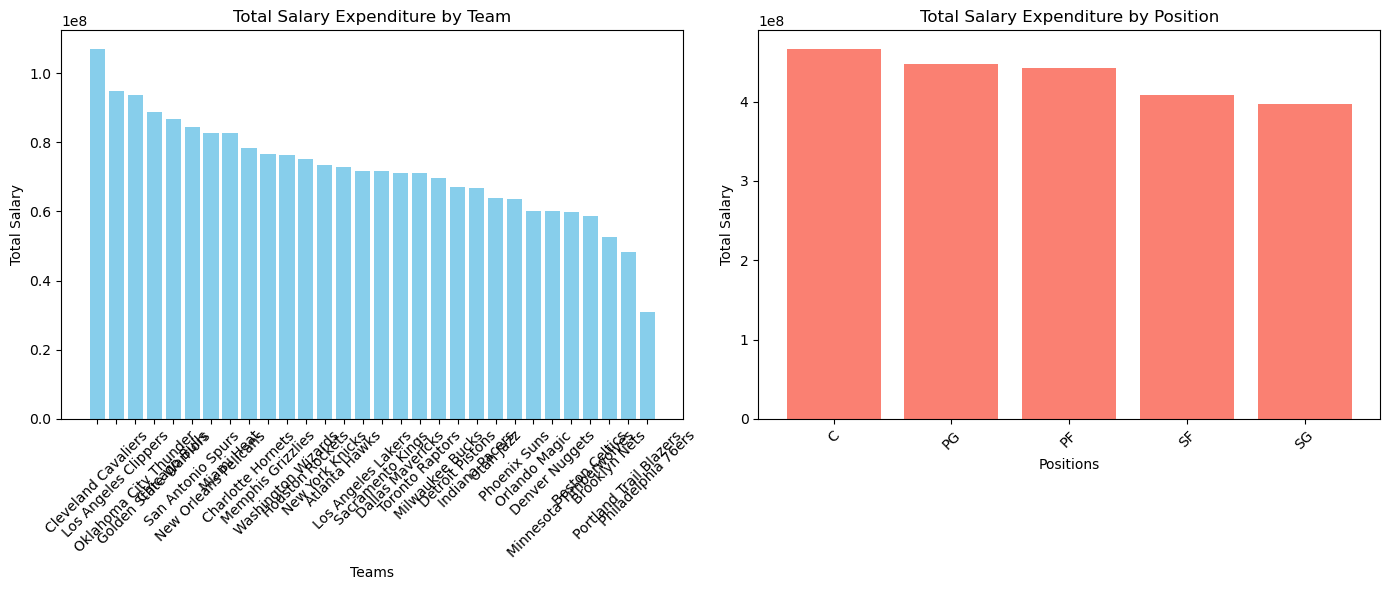

In [12]:
#Highest Salary Expenditure
team_salary = df.groupby("Team")["Salary"].sum().sort_values(ascending=False)
position_salary = df.groupby("Position")["Salary"].sum().sort_values(ascending=False)

# Create a figure with two subplots (one for team and one for position)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar Chart for Salary Expenditure by Team
axes[0].bar(team_salary.index, team_salary.values, color='skyblue')
axes[0].set_title("Total Salary Expenditure by Team")
axes[0].set_xlabel("Teams")
axes[0].set_ylabel("Total Salary")
axes[0].tick_params(axis='x', rotation=45)

# Bar Chart for Salary Expenditure by Position
axes[1].bar(position_salary.index, position_salary.values, color='salmon')
axes[1].set_title("Total Salary Expenditure by Position")
axes[1].set_xlabel("Positions")
axes[1].set_ylabel("Total Salary")
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout for better visibility
plt.tight_layout()

# Show the plot
plt.show()



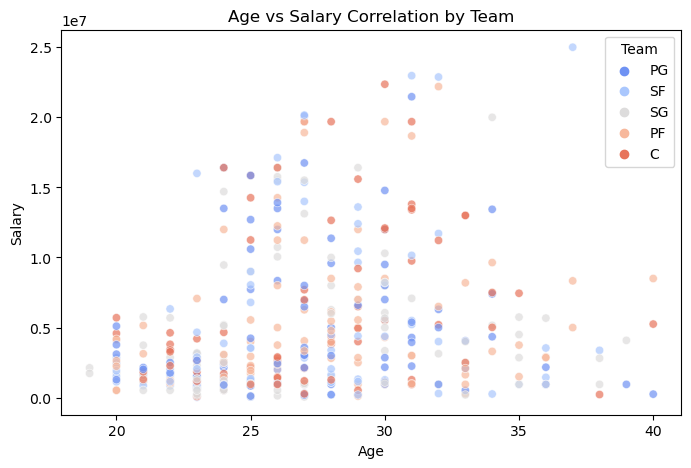

In [11]:
# Scatter plot with different colors based on "team"
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Age"], y=df["Salary"], hue=df["Position"], palette="coolwarm", alpha=0.7)

# Labels and Title
plt.title("Age vs Salary Correlation by Team")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend(title="Team")  # Adds a legend
plt.show()